<a href="https://colab.research.google.com/github/roulupen-mldl/EVA7/blob/main/Session4/EVA7_Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN Model for MNIST digit classifier.** 

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

**Model Architecture**

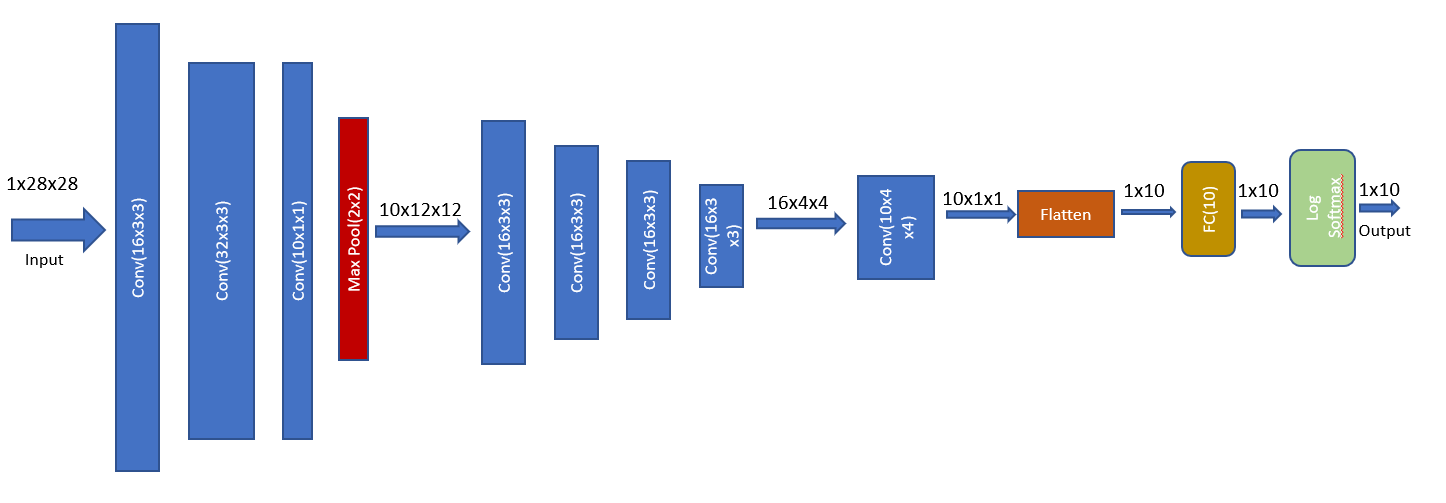


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 3), # 1x28x28x | 16(3x3) | 16x26x26
            nn.ReLU(),
            nn.BatchNorm2d(16), # Batch normalization
            nn.Dropout(0.1), # drop out

            nn.Conv2d(16, 32, 3), # 16x26x26 | 32(3x3) | 32x24x24
            nn.ReLU(),
            nn.BatchNorm2d(32), # Batch normalization
            nn.Dropout(0.1), # drop out

            nn.Conv2d(32, 10, 1),# 32x24x24 | 10(1x1) | 10x24x24
            nn.ReLU(),

            nn.MaxPool2d(2, 2), # 10x24x24 | 10x12x12
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(10, 16, 3), # 10x12x12 | 16(3x3) | 16x(10x10)
            nn.ReLU(),
            nn.BatchNorm2d(16), # Batch normalization
            nn.Dropout(0.1), # drop out

            nn.Conv2d(16, 16, 3), # 16x10x10 | 16(3x3) | 16x(8x8)
            nn.ReLU(),
            nn.BatchNorm2d(16), # Batch normalization
            nn.Dropout(0.1), # drop out

            nn.Conv2d(16, 16, 3), # 16x8x8 | 16(3x3) | 16x(6x6)
            nn.ReLU(),
            nn.BatchNorm2d(16), # Batch normalization
            nn.Dropout(0.1), # drop out

            nn.Conv2d(16, 16, 3), # 16x6x6 | 16(3x3) | 16x(4x4)
            nn.ReLU(),
            nn.BatchNorm2d(16), # Batch normalization
            nn.Dropout(0.1), # drop out
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 10, 4), # 16x4x4 | 10(4x4) | 10x(1x1)
            nn.ReLU(),
            nn.BatchNorm2d(10), # Batch normalization
            nn.Dropout(0.1) # drop out
        )
        
        self.fc = nn.Sequential( 
            nn.Linear(10, 10)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x

**Model Summary**

In [ ]:
# Displaying model summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,640
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
           Dropout-8           [-1, 32, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             330
             ReLU-10           [-1, 10, 24, 24]               0
        MaxPool2d-11           [-1, 10, 12, 12]               0
           Conv2d-12           [-1, 16, 10, 10]           1,456
             ReLU-13           [-1, 16, 10, 10]               0
      BatchNorm2d-14           [-1, 16,

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


**Preparing training and test data loader for training and validation**

In [ ]:
# Preparing train and test loader for training
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation(30),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


**Defining function to train and validate**

In [ ]:
# Train and validation
from tqdm import tqdm
def train(model, device, train_loader, optimizer, loss_function, lr_scheduler, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} LR: {optimizer.param_groups[0]["lr"]} batch_id={batch_idx}')
    
    # Updating learning rate after each epoch
    lr_scheduler.step()

def test(model, device, test_loader, loss_function, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_function(output, target)
            test_loss += loss.item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nEpoch:{} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(epoch,
        test_loss, correct, len(test_loader.dataset),
        100 * correct / len(test_loader.dataset)))

**Model training and validation**

In [ ]:
# Initialize model with learning rate scheduler, loss function and optimizer
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.1) # optimizer
loss_function = F.cross_entropy # loss function
lambda1 = lambda epoch: round(0.1 * 1/(1 + 0.319 * epoch), 10) # learning rate
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1) # learning rate scheduler

# Model training & validation
for epoch in range(1, 21):
  train(model, device, train_loader, optimizer, loss_function, lr_scheduler, epoch)
  test(model, device, test_loader, loss_function, epoch)


loss=0.18191516399383545 LR: 0.010000000000000002 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.22it/s]



Epoch:1 Test set: Average loss: 0.0005, Accuracy: 9805/10000 (98.05%)



loss=0.047370944172143936 LR: 0.007581501140000001 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.03it/s]



Epoch:2 Test set: Average loss: 0.0004, Accuracy: 9827/10000 (98.27%)



loss=0.07604532688856125 LR: 0.00610500611 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]



Epoch:3 Test set: Average loss: 0.0004, Accuracy: 9864/10000 (98.64%)



loss=0.0994354709982872 LR: 0.0051098620300000005 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.14it/s]



Epoch:4 Test set: Average loss: 0.0003, Accuracy: 9888/10000 (98.88%)



loss=0.08652856200933456 LR: 0.00439367311 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.18it/s]



Epoch:5 Test set: Average loss: 0.0002, Accuracy: 9918/10000 (99.18%)



loss=0.13949690759181976 LR: 0.0038535645500000003 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.03it/s]



Epoch:6 Test set: Average loss: 0.0002, Accuracy: 9891/10000 (98.91%)



loss=0.05737486481666565 LR: 0.0034317089900000003 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.04it/s]



Epoch:7 Test set: Average loss: 0.0002, Accuracy: 9913/10000 (99.13%)



loss=0.06265316158533096 LR: 0.00309310238 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 16.91it/s]



Epoch:8 Test set: Average loss: 0.0003, Accuracy: 9900/10000 (99.00%)



loss=0.05782516673207283 LR: 0.00281531532 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.01it/s]



Epoch:9 Test set: Average loss: 0.0002, Accuracy: 9917/10000 (99.17%)



loss=0.1332884281873703 LR: 0.0025833118100000003 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.09it/s]



Epoch:10 Test set: Average loss: 0.0002, Accuracy: 9916/10000 (99.16%)



loss=0.04740471765398979 LR: 0.0023866348400000004 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.13it/s]



Epoch:11 Test set: Average loss: 0.0002, Accuracy: 9925/10000 (99.25%)



loss=0.09961902350187302 LR: 0.0022177866500000002 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.08it/s]



Epoch:12 Test set: Average loss: 0.0002, Accuracy: 9922/10000 (99.22%)



loss=0.038910821080207825 LR: 0.00207125104 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 16.99it/s]



Epoch:13 Test set: Average loss: 0.0002, Accuracy: 9920/10000 (99.20%)



loss=0.06961670517921448 LR: 0.0019428793500000001 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.15it/s]



Epoch:14 Test set: Average loss: 0.0002, Accuracy: 9928/10000 (99.28%)



loss=0.06126169487833977 LR: 0.0018294914 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.08it/s]



Epoch:15 Test set: Average loss: 0.0002, Accuracy: 9930/10000 (99.30%)



loss=0.0913342833518982 LR: 0.00172860847 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.18it/s]



Epoch:16 Test set: Average loss: 0.0002, Accuracy: 9920/10000 (99.20%)



loss=0.014996021054685116 LR: 0.0016382699899999999 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.18it/s]



Epoch:17 Test set: Average loss: 0.0002, Accuracy: 9928/10000 (99.28%)



loss=0.05374161899089813 LR: 0.00155690487 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 16.93it/s]



Epoch:18 Test set: Average loss: 0.0002, Accuracy: 9938/10000 (99.38%)



loss=0.040314529091119766 LR: 0.00148323939 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 17.04it/s]



Epoch:19 Test set: Average loss: 0.0002, Accuracy: 9941/10000 (99.41%)



loss=0.022165248170495033 LR: 0.00141623 batch_id=468: 100%|██████████| 469/469 [00:27<00:00, 16.89it/s]



Epoch:20 Test set: Average loss: 0.0002, Accuracy: 9938/10000 (99.38%)



**From the model log it's showing the best validation accuracy is 99.41%**